## Classification (PA3.5c)

In [1]:
## Data generation

In [2]:
from basic_fcn import *
from unet_fcn import *
from utils import *
import torch.optim as optim
import time
from torch.utils.data import DataLoader
import torch
import gc
import copy
from dataloader_4 import *
from starter_5 import *

# Precomputed Class Weights
lts = [1/1.7796e-01, 1/6.1295e-01, 1/4.1182e-02, 1/8.9837e-03, 1/1.0163e-01, 1/6.8722e-03,1/ 1.4485e-03, 1/1.5937e-04, 1/4.7746e-02, 0]

class_weights = torch.FloatTensor(lts)

class DiceBCELoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(DiceBCELoss, self).__init__()

    def forward(self, inputs, targets, smooth=1):
        
        #comment out if your model contains a sigmoid or equivalent activation layer
        inputs = F.sigmoid(inputs)       
        
        #flatten label and prediction tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)
        
        intersection = (inputs * targets).sum()                            
        dice_loss = 1 - (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)  
        BCE = F.binary_cross_entropy(inputs, targets, reduction='mean')
        Dice_BCE = BCE + dice_loss
        
        return Dice_BCE
dice = DiceBCELoss()
    
#hyper param
epochs = 50   
lr = 0.0004
criterion = dice
n_class = 10

print("creating model...")
fcn_model = UNET(n_class=n_class)
fcn_model.apply(init_weights)

# gpu
gpu_status = torch.cuda.is_available()
print("GPU:", gpu_status)

if gpu_status : 
    device = torch.device('cuda') # determine which device to use (gpu or cpu)
else : 
    device = torch.device('cpu')

fcn_model.to(device)



print("Training...")
val(fcn_model, 0)  # show the accuracy before training
model_name="latest_model_5ckkkk"
train_loss_record, valid_loss_record = train(fcn_model, epochs,lr, save_fp=model_name) 

status : GPU
creating model...
GPU: True
Training...


/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Loss at epoch: 0 is 1.961186408996582
IoU at epoch: 0 is 0.08204511986984
Pixel acc at epoch: 0 is 0.5780550952141101
epoch0, iter0, loss: 2.6652066707611084
epoch0, iter10, loss: 1.2568469047546387
epoch0, iter20, loss: 1.6496880054473877
epoch0, iter30, loss: 1.6254624128341675
epoch0, iter40, loss: 0.8668165802955627
epoch0, iter50, loss: 1.2210228443145752
epoch0, iter60, loss: 0.645649790763855
epoch0, iter70, loss: 1.0570405721664429
epoch0, iter80, loss: 0.8725721836090088
epoch0, iter90, loss: 0.9521672129631042
epoch0, iter100, loss: 1.3782626390457153
Finish epoch 0, time elapsed 140.62702751159668
Loss at epoch: 0 is 1.1023120421629686
IoU at epoch: 0 is 0.21147355505959925
Pixel acc at epoch: 0 is 0.7079053910878988
epoch1, iter0, loss: 0.8147745132446289
epoch1, iter10, loss: 0.9567463397979736
epoch1, iter20, loss: 0.6247513890266418
epoch1, iter30, loss: 1.0131090879440308
epoch1, iter40, loss: 1.031848430633545
epoch1, iter50, loss: 1.2839884757995605
epoch1, iter60, lo

epoch13, iter0, loss: 1.0774997472763062
epoch13, iter10, loss: 0.5641000270843506
epoch13, iter20, loss: 0.5210863947868347
epoch13, iter30, loss: 0.8939775824546814
epoch13, iter40, loss: 0.3872368633747101
epoch13, iter50, loss: 0.6160860657691956
epoch13, iter60, loss: 0.1898576021194458
epoch13, iter70, loss: 0.7208507061004639
epoch13, iter80, loss: 0.6923801898956299
epoch13, iter90, loss: 0.3729363679885864
epoch13, iter100, loss: 0.48721832036972046
Finish epoch 13, time elapsed 142.10652565956116
Loss at epoch: 13 is 0.41225180602990663
IoU at epoch: 13 is 0.4395021075200913
Pixel acc at epoch: 13 is 0.8515311892216022
epoch14, iter0, loss: 0.3005310297012329
epoch14, iter10, loss: 0.39818722009658813
epoch14, iter20, loss: 0.31237393617630005
epoch14, iter30, loss: 0.6002209186553955
epoch14, iter40, loss: 0.4671051800251007
epoch14, iter50, loss: 0.27067506313323975
epoch14, iter60, loss: 0.3477689027786255
epoch14, iter70, loss: 0.729969322681427
epoch14, iter80, loss: 0.6

epoch26, iter0, loss: 0.5319178104400635
epoch26, iter10, loss: 0.8717191219329834
epoch26, iter20, loss: 0.24277809262275696
epoch26, iter30, loss: 0.2981517016887665
epoch26, iter40, loss: 0.4345896244049072
epoch26, iter50, loss: 0.22088725864887238
epoch26, iter60, loss: 0.5221551656723022
epoch26, iter70, loss: 0.4223920702934265
epoch26, iter80, loss: 0.31129851937294006
epoch26, iter90, loss: 0.4275575578212738
epoch26, iter100, loss: 0.9715706706047058
Finish epoch 26, time elapsed 138.24205231666565
Loss at epoch: 26 is 0.393555495601434
IoU at epoch: 26 is 0.46860024303139886
Pixel acc at epoch: 26 is 0.881782027391287
epoch27, iter0, loss: 0.44734224677085876
epoch27, iter10, loss: 0.4460161030292511
epoch27, iter20, loss: 1.2366727590560913
epoch27, iter30, loss: 0.34198707342147827
epoch27, iter40, loss: 0.23671549558639526
epoch27, iter50, loss: 0.20819032192230225
epoch27, iter60, loss: 0.2175672948360443
epoch27, iter70, loss: 0.3216233253479004
epoch27, iter80, loss: 0

Loss at epoch: 38 is 0.2527761338995053
IoU at epoch: 38 is 0.5504036889562999
Pixel acc at epoch: 38 is 0.9100168439058157
epoch39, iter0, loss: 0.2764953076839447
epoch39, iter10, loss: 0.14363335072994232
epoch39, iter20, loss: 0.16858410835266113
epoch39, iter30, loss: 0.46701744198799133
epoch39, iter40, loss: 0.14817704260349274
epoch39, iter50, loss: 0.7144778966903687
epoch39, iter60, loss: 0.5637353658676147
epoch39, iter70, loss: 0.22175198793411255
epoch39, iter80, loss: 0.44577136635780334
epoch39, iter90, loss: 0.247256338596344
epoch39, iter100, loss: 0.22791367769241333
Finish epoch 39, time elapsed 127.83494424819946
Loss at epoch: 39 is 0.2827606384570782
IoU at epoch: 39 is 0.4800546184268235
Pixel acc at epoch: 39 is 0.8993590703377357
epoch40, iter0, loss: 0.3826708197593689
epoch40, iter10, loss: 0.8043071627616882
epoch40, iter20, loss: 0.22030356526374817
epoch40, iter30, loss: 0.40711450576782227
epoch40, iter40, loss: 0.15900486707687378
epoch40, iter50, loss: 

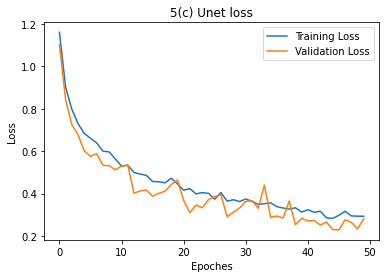

In [5]:
#plot
plt.plot(np.arange(epochs), train_loss_record, label= "Training Loss")
plt.plot(np.arange(epochs), valid_loss_record, label="Validation Loss")
plt.xlabel("Epoches")
plt.ylabel("Loss")
plt.legend()
plt.title("5(c) Unet loss")
plt.savefig("Q5_c")
plt.show()